# Logistic Regression
In dit notebook wordt het Logistic Regression model toegepast op de dataset.

In [1]:
import pickle

import pandas as pd

from os.path import exists

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import  StandardScaler, LabelEncoder

MODELNAME = "logistic_regression"

EXISTING_MODEL = exists(f'../models/{MODELNAME}.pkl')



In [2]:
data = pd.read_csv("../data/processed/sample.csv").convert_dtypes()

## Preprocessing


In [3]:
# Verwijder NaN values
data = data.dropna()

# Aan de hand van deze kolommen wordt voorspeld of de schijf failed is (het 'x'-as)
predictor_columns = [
    "smart_5_raw",
    "smart_9_raw",
    "smart_187_raw",
    "smart_188_raw",
    "smart_194_raw",
    "smart_197_raw",
    "smart_198_raw"
]
x = data[predictor_columns]

# Deze feature wordt voorspeld (het 'y'-as)
target_column = "failure"
y = data[target_column]

# Standaardiseren van x kolommen
x_scaler = StandardScaler()
x = x_scaler.fit_transform(x)

# Label encoden van de y kolom
# dit zorgt ervoor dat unieke waardes worden vervangen
# door een label
y_scaler = LabelEncoder()
y = y_scaler.fit_transform(y)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=69)

In [5]:
if EXISTING_MODEL:
    model = pickle.load(open(f'../models/{MODELNAME}.pkl', 'rb'))
else:
    model = LogisticRegression()
    model = model.fit(x_train, y_train)

In [6]:
prediction = model.predict(x_test)

In [7]:
accuracy_score(y_test, prediction)

0.9999686395638263

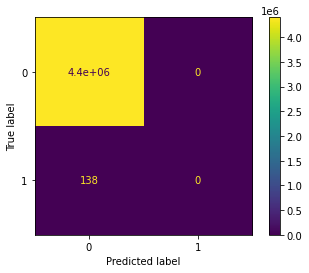

In [8]:
# Omdat we de y-as gelabeld hebben (ipv de originele waardes)
# geven we die originele waardes om het correcte label in de grafiek te krijgen
# Dit doen we middels `inverse_transoform()` op de y_scaler

cm = confusion_matrix(y_test, prediction, labels=y_scaler.inverse_transform(model.classes_))

ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=y_scaler.inverse_transform(model.classes_)
).from_predictions(y_test, prediction)

In [9]:
if not EXISTING_MODEL:
    pickle.dump(model, open('../models/logistic_regression.pkl', 'wb'))